In [1]:
%load_ext autoreload
%autoreload 2

from QuickSort import quickSort
from HeapSort import heapSort
from MergeSort import mergeSort
from genData import gen
import numpy as np
import time 

### Preparing Dataset

In [3]:
n = 10
m = 1000000
lim = 1e9
dataSet = gen(n, m, lim)

In [28]:
print(dataSet[0])

[-9.99642185e+08 -9.99377093e+08 -9.99083372e+08 ...  9.99608250e+08
  9.99739585e+08  9.99747918e+08]


### QuickSort

In [6]:
quickSortDurations = []

for a in dataSet:
    start = time.perf_counter()
    quickSort(a, 0, m-1)
    end = time.perf_counter()
    quickSortDurations.append((end - start) * 1000)
    print((end - start) * 1000)

2975.3676719992654
2968.480000999989
3101.435024998864
2927.1968020002532
3031.3497859988274
3576.6020930004743
3656.7949269992823
3494.5973249996314
3381.405222999092
3314.4485949997033


### HeapSort

In [5]:
heapSortDurations = []

for a in dataSet:
    start = time.perf_counter()
    heapSort(a)
    end = time.perf_counter()
    heapSortDurations.append((end - start) * 1000)
    print((end - start) * 1000)

6243.754320999869
5893.509829998948
6196.928542000023
6189.949368999805
6096.239932001481
7066.269519000343
7152.816810001241
6953.381138000623
6677.775252001084
6692.202288000772


### MergeSort 

In [7]:
mergeSortDurations = []

for a in dataSet:
    start = time.perf_counter()
    mergeSort(a, 0, m - 1)
    end = time.perf_counter()
    mergeSortDurations.append((end - start) * 1000)
    print((end - start) * 1000)

2923.1644669998786
2867.709427999216
2867.723657998795
2877.750569001364
2887.1007050001936
3248.182844999974
3280.280861999927
3241.2642819999746
3220.2154340011475
3209.8797819999163


### Python Sort (NumPy)

In [8]:
numpySortDurations = []

for a in dataSet:
    start = time.perf_counter()
    a = np.sort(a)
    end = time.perf_counter()
    numpySortDurations.append((end - start) * 1000)
    print((end - start) * 1000)

50.892137000118964
49.637138999969466
47.30524099977629
36.311836000095354
34.77781800029334
33.509759001390194
33.62255499996536
33.58218600078544
33.6439260008774
33.48601200013945


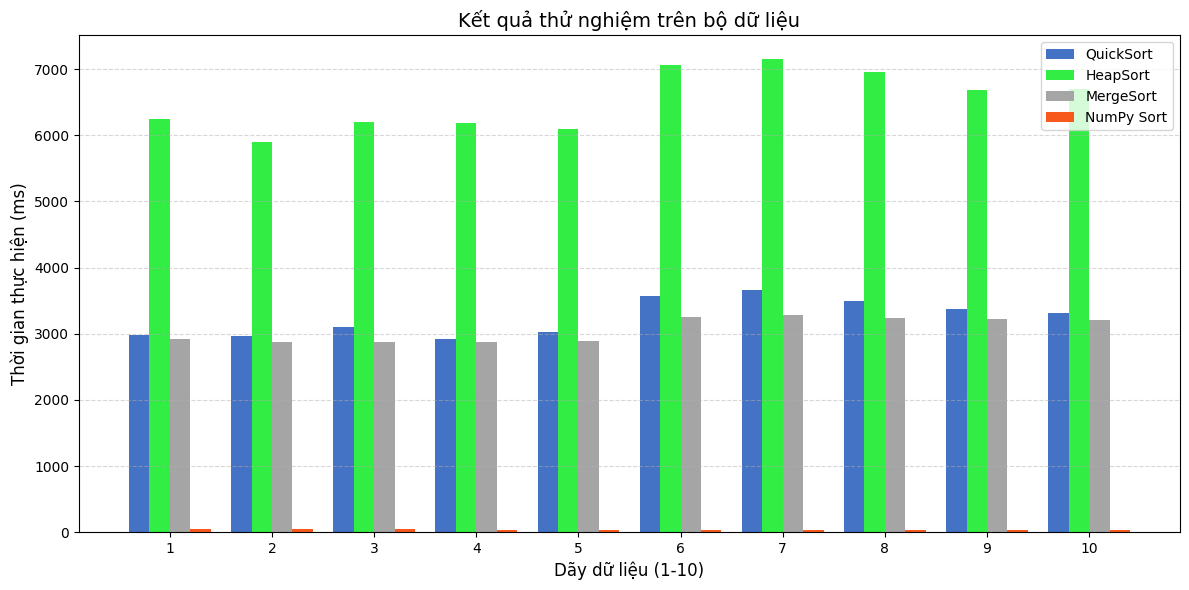

In [10]:
import matplotlib.pyplot as plt
import numpy as np


labels = np.arange(1, 11) 
width = 0.2 

fig, ax = plt.subplots(figsize=(12, 6))

rects1 = ax.bar(labels - 1.5*width, quickSortDurations, width, label='QuickSort', color='#4472C4')
rects2 = ax.bar(labels - 0.5*width, heapSortDurations, width, label='HeapSort', color="#31ED44")
rects3 = ax.bar(labels + 0.5*width, mergeSortDurations, width, label='MergeSort', color='#A5A5A5')
rects4 = ax.bar(labels + 1.5*width, numpySortDurations, width, label='NumPy Sort', color="#F6591B")

ax.set_xlabel('Dãy dữ liệu (1-10)', fontsize=12)
ax.set_ylabel('Thời gian thực hiện (ms)', fontsize=12)
ax.set_title('Kết quả thử nghiệm trên bộ dữ liệu', fontsize=14)
ax.set_xticks(labels)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()